# Autoencoders - Hands_On

Sofía Maldonado García <br>
Luego lo hago bonito

### Part 1: PCA vs AutoEncoder

In [154]:
# Imports
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Deep Learning
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import matplotlib.pyplot as plt

In [155]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [156]:
X.shape

(150, 4)

In [157]:
X.min(), X.max()

(np.float64(0.1), np.float64(7.9))

In [158]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [159]:
X_scaled.min(), X_scaled.max()

(np.float64(0.0), np.float64(1.0))

In [160]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [161]:
X_pca.shape

(150, 2)

In [210]:
# Autoencoder

encoding_dim = 2 # Porque tenemos dos componentes de salida

autoencoder = Sequential([
    Dense(encoding_dim,input_shape = (X_scaled.shape[1],), activation="linear"), # Encoder
    Dense(X_scaled.shape[1], activation="linear") # Decoder
])

In [211]:
# Compilation
autoencoder.compile(
    optimizer=Adam(), 
    loss="mean_squared_error",
)

In [212]:
# Fitting (.fit mention!)

autoencoder.fit(
    x = X_scaled,
    y = X_scaled, # Because, in an autoencoder, we want the same output as the input. This is not supervised
    epochs=10,
    batch_size=16,
    shuffle=True
)

Epoch 1/10


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8721  
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8060 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7513 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6994 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6504 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6081 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5701 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5346 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5037 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4760 


In [213]:
# Consiguiendo el espacio latente: la capa de en medio
autoencoder.layers[:1]

[<Dense name=dense_36, built=True>]

In [214]:
# Tomas las capas que te interesan y las pones en un nuevo modelo (cool)
encoder = Sequential(autoencoder.layers[:1])

encoder

<Sequential name=sequential_37, built=True>

In [215]:
# Predict
X_autoencoder = encoder.predict(X_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [216]:
# Son iguales!!!!
X_autoencoder.shape, X_pca.shape

((150, 2), (150, 2))

Text(0.5, 1.0, 'Autoencoder Reduction')

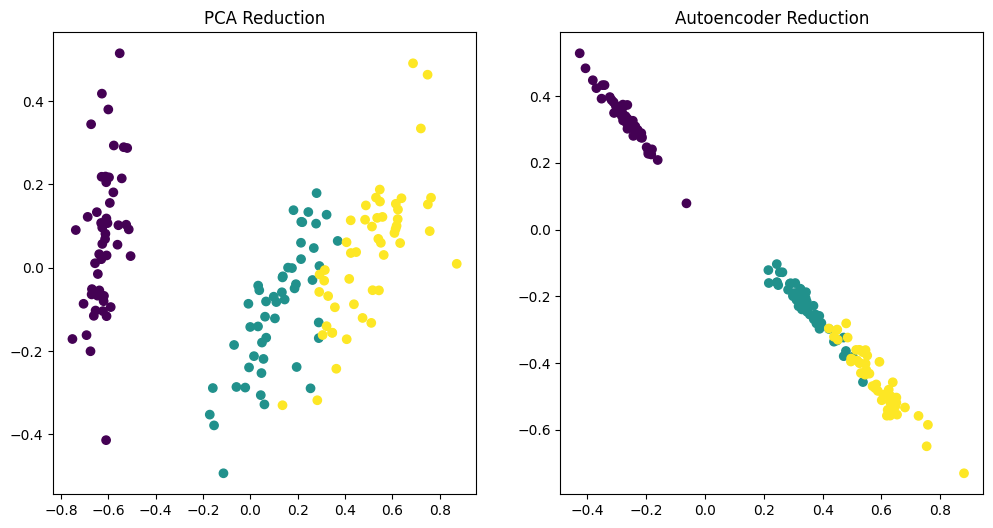

In [217]:
# Comparando gráficamente
plt.figure(figsize=(12,6))

# X_pca
plt.subplot(1,2,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA Reduction")

# X_autoencoded
plt.subplot(1,2,2)
plt.scatter(X_autoencoder[:, 0], X_autoencoder[:, 1], c=y)
plt.title("Autoencoder Reduction")